In [2]:
import os
os.chdir("/content")
!rm -rf STAT-7220- Applied-Experimental-Design
print(os.getcwd())

/content


In [3]:
import os
os.chdir("/content")
!rm -rf STAT-7220- Applied-Experimental-Design


# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "djuarez7-KSU"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
   print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/djuarez7-KSU/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/djuarez7-KSU/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

**Answer:** Our main objective is to determine which again time affects more the bitterness (IBUs) measurement of the new IPA

**Question 2.** Specify the outcome variable

**Answer:** The outcome variable will be the IBUs

**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Answer:** The independent variable (IV) at this time it will be aging tanks

Possible lurking variables could be:
- the temperature of the room where it will be hold the tanks
- the tanks where the brew will be storage they will be the same size and material
- the time and day in wich the measurement will take place


**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Answer:** $$ H_0: \mu_{\text{week1}} = \mu_{\text{week2}} = \mu_{\text{week3}} $$

$$ H_1: \text{At least one pair of means differ substantially} $$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Answer:** After checking the initial EDA and creating a visualization, I can infere that the alternative hypothesis is supported for the boxplot; since, we can see a strong overlapping  which potentially indicates that the response pattern between all the weeks groups may be substantially different.


     Weeks    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None
           mean        std
Weeks                     
3 Weeks  45.657   5.548563
4 Weeks  60.164  10.390411
5 Weeks  71.791  12.627946


Text(0.5, 1.0, 'Boxplot of IBUs by Aging Time')

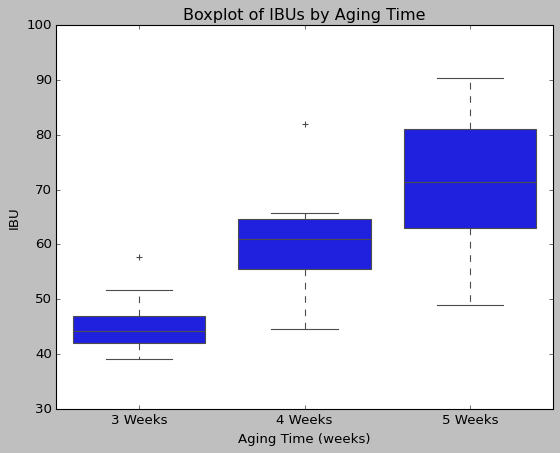

In [26]:
#Import the packages we will use for the exercise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
ipa = pd.read_excel("IPA.xlsx")

#check the data
print(ipa.head())
print(ipa.info())

#calculate the mean and std if the IPA by tank
ipa_stats = ipa.groupby("Weeks")["IBU"].agg(['mean', 'std'])
print(ipa_stats)

#generate the visualization with a boxplot
sns.boxplot(x = 'Weeks', y = 'IBU', data = ipa)

#add the labels
plt.xlabel('Aging Time (weeks)')
plt.ylabel('IBU')
plt.title('Boxplot of IBUs by Aging Time')


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Answer:**
- Our $F_{\text{Stat}} = 17.25$ and has an associated p-value of 0.00001.
- As we can see, most of the points fall near the line bisecting the graph.

The normality test hypothesis:

$$ H_0: \text{The Normality Assumption is Met} $$

$$ H_1: \text{The Normality Assumption is Not Met} $$

- Here we get both the test statistic ($W=0.98$) as well as its associated p-value ($p=0.9734$).

- Since $p > \alpha = 0.05$, this tells us the data more strongly support the  **null** hypothesis, meaning that the assumption of normality is supported by the data.

We can conclude that the testing method as well the QQ plot support that the assumptions follow a normal distribution.

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  3428.75378  1714.376890  17.246546  0.000015
Residual  27.0  2683.90994    99.404072        NaN       NaN


ShapiroResult(statistic=np.float64(0.9876508728828111), pvalue=np.float64(0.9734239573476953))

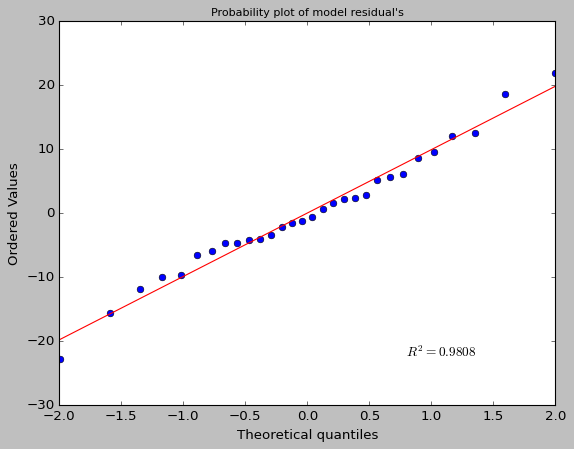

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#lets fit One-Way ANOVA model
ipa_model = ols('IBU~Weeks', data = ipa).fit()

print(sm.stats.anova_lm(ipa_model, typ= 1))

#lets extract the residuals
residuals = ipa_model.resid

#crate the QQ plot for the residuals
normality_plot, stat = stats.probplot(residuals, plot = plt, rvalue = True)
plt.title("Probability plot of model residual's", fontsize= 10)

## Perform Shapiro-Wilk Test of Normality ##
stats.shapiro(residuals)



**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Answer:**
- For each group mean, the residuals are mostly centered around 0, which implies that the residual mean being approximately 0 seems reasonable.

- Additionally, while the residuals are not exactly the same width, they are not drastically different either.

State the statistical hypothesis for the inferential test:

$$ H_0: \text{Variance is Constant} $$

$$ H_1: \text{Variance is Not Constant} $$

- Since our p-value > to 0.05,the data more strongly support the  **null** hypothesis.

Since the scatterplot of standardized residuals to fitted values looked reasonably good and the test support the **null hypothesis**, we can feel comfortable assuming the data support the constant variance assumption.



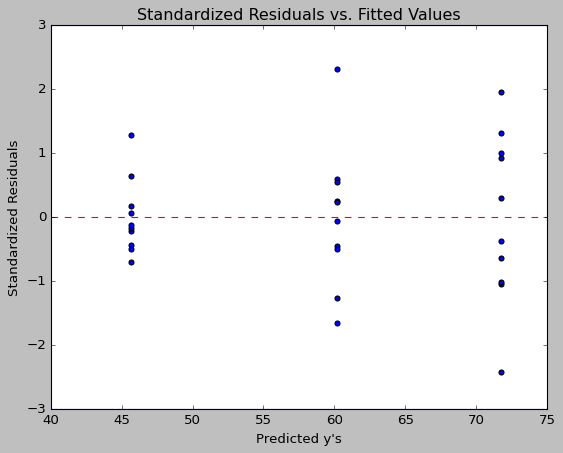

F-statistic: 1.9302562326002541
P-value: 0.16461466112533732


In [42]:
#obtain the Standardized Residuals

standardized_residuals = ipa_model.get_influence().resid_studentized_internal

#get the fitted values

fitted_values = ipa_model.fittedvalues

## Create the plot ##

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

#lets run a Bruesch-Pagan Test
#import the required function for our test
from statsmodels.stats.diagnostic import het_breuschpagan

#run the B-P test
bp_test =  het_breuschpagan(ipa_model.resid, ipa_model.model.exog)

#extract tge F-statistics abd the P-values
f_statistic = bp_test[2]
f_p_value = bp_test[3]

#print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {f_p_value}")

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Answer:** the **alternative hypothesis** is more strongly supported since our $p < \alpha = 0.05$. this suggests the **rejection of the null hypothesis**.

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#lets fit One-Way ANOVA model
ipa_model = ols('IBU~Weeks', data = ipa).fit()

print(sm.stats.anova_lm(ipa_model, typ= 1))

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  3428.75378  1714.376890  17.246546  0.000015
Residual  27.0  2683.90994    99.404072        NaN       NaN


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Answer:**
- These results, as shown by the adjusted $p > 0.05$, indicate that the mean rating for each week tank is greater than each other, founding a statistically difference between the bitterness in each group.


In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Perform Tukey's HSD test ##

tukey_result = pairwise_tukeyhsd(endog=ipa['IBU'], groups=ipa['Weeks'],
                                 alpha=0.05)

print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   14.507 0.0083  3.4518 25.5622   True
3 Weeks 5 Weeks   26.134    0.0 15.0788 37.1892   True
4 Weeks 5 Weeks   11.627 0.0378  0.5718 22.6822   True
------------------------------------------------------


**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.